In [6]:
import argparse
import json
import h5py
import imageio
import numpy as np
import os
from copy import deepcopy
import glob 

import torch

import robomimic
import robomimic.utils.file_utils as FileUtils
import robomimic.utils.torch_utils as TorchUtils
import robomimic.utils.tensor_utils as TensorUtils
import robomimic.utils.obs_utils as ObsUtils
from robomimic.envs.env_base import EnvBase
from robomimic.algo import RolloutPolicy

ROBOMIMIC WARNING(
    No private macro file found!
    It is recommended to use a private macro file
    To setup, run: python /home/sj/Assistive_Feeding_Gello/gello/dm_control_tasks/robomimic/robomimic/scripts/setup_macros.py
)


In [7]:
import pandas as pd
import numpy as np

csv_folder = "/home/sj/Assistive_Feeding_Gello/csv/90close"

csv_files = glob.glob(os.path.join(csv_folder, '*.csv'))

low_dim_data = []

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


for csv_file in csv_files:
        joint_data = pd.read_csv(csv_file, usecols=range(0, 6), engine='python').astype(np.float64)
        end_eff_pos_data = pd.read_csv(csv_file, usecols=range(6, 9), engine='python').astype(np.float64)
        end_eff_quat_data = pd.read_csv(csv_file, usecols=range(9, 13), engine='python').astype(np.float64)

        joint_data = torch.tensor(joint_data.values).float().to(device)
        end_eff_pos_data = torch.tensor(end_eff_pos_data.values).float().to(device)
        end_eff_quat_data = torch.tensor(end_eff_quat_data.values).float().to(device)
        break

# obs = {"robot0_joint_pos": joint_data, "robot0_eef_pos": end_eff_pos_data, "robot0_eef_quat": end_eff_quat_data}
# print(obs["robot0_joint_pos"].shape, obs["robot0_eef_pos"].shape, obs["robot0_eef_quat"].shape)

obs = {"robot0_eef_pos": end_eff_pos_data}
print(obs["robot0_eef_pos"])

NameError: name 'device' is not defined

In [3]:
import robomimic.utils.file_utils as FileUtils

print(FileUtils.policy_from_checkpoint.__code__.co_filename)


/home/sj/Assistive_Feeding_Gello/gello/dm_control_tasks/robomimic/robomimic/utils/file_utils.py


In [8]:
# ckpt_path = "/home/sj/Assistive_Feeding_Gello/gello/dm_control_tasks/robomimic/bc_trained_models/allready2/20240701201504/models/model_epoch_100.pth"
ckpt_path = "/home/sj/Assistive_Feeding_Gello/gello/dm_control_tasks/robomimic/bc_trained_models/allready3/20240701203825/models/model_epoch_150.pth"
# Restore policy
policy, ckpt_dict = FileUtils.policy_from_checkpoint(ckpt_path=ckpt_path, device=device, verbose=True)


============= Loaded Config =============
{
    "algo_name": "bc",
    "experiment": {
        "name": "allready3",
        "validate": false,
        "logging": {
            "terminal_output_to_txt": true,
            "log_tb": true,
            "log_wandb": false,
            "wandb_proj_name": "debug"
        },
        "save": {
            "enabled": true,
            "every_n_seconds": null,
            "every_n_epochs": 50,
            "epochs": [],
            "on_best_validation": false,
            "on_best_rollout_return": false,
            "on_best_rollout_success_rate": true
        },
        "epoch_every_n_steps": 100,
        "validation_epoch_every_n_steps": 10,
        "env": null,
        "additional_envs": null,
        "render": false,
        "render_video": false,
        "keep_all_videos": false,
        "video_skip": 5,
        "rollout": {
            "enabled": false,
            "n": 50,
            "horizon": 400,
            "rate": 50,
            "warm

In [9]:
import torch

# Assuming policy is a PyTorch model
def action_from_policy(policy, obs):
    # Get action from policy
    with torch.no_grad():
        action = policy(obs)
    return action

# Convert the observation to a tensor and remove singleton dimensions
obstensor = torch.tensor(obs["robot0_eef_pos"], dtype=torch.float32).detach().clone()

for i in range(len(obs["robot0_eef_pos"])):
    if i == 0:
        obs_to_pass = {"robot0_eef_pos": obstensor[1]}
        action = action_from_policy(policy, obs_to_pass)
        print("Action", action, "robot0_eef_pos", obs_to_pass["robot0_eef_pos"])
        continue
    
    obs_to_pass = {"robot0_eef_pos": action}
    action = action_from_policy(policy, obs_to_pass)
    print("Action", action, "robot0_eef_pos", obs_to_pass["robot0_eef_pos"])


/tmp/ipykernel_5800/2214723357.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  obstensor = torch.tensor(obs["robot0_eef_pos"], dtype=torch.float32).detach().clone()


dict_keys(['robot0_eef_pos'])
Action [ 0.01716338 -0.13567233 -0.3025337 ] robot0_eef_pos tensor([ 0.0157, -0.1419, -0.2811])
Action [ 0.00260119 -0.53935325 -0.2590238 ] robot0_eef_pos [ 0.01716338 -0.13567233 -0.3025337 ]
Action [-0.06338358 -0.7941153  -0.19332676] robot0_eef_pos [ 0.00260119 -0.53935325 -0.2590238 ]
Action [-0.15762787 -0.9103736  -0.08852187] robot0_eef_pos [-0.06338358 -0.7941153  -0.19332676]
Action [-0.2426917  -0.9535842   0.01657412] robot0_eef_pos [-0.15762787 -0.9103736  -0.08852187]
Action [-0.30276555 -0.97017777  0.09734286] robot0_eef_pos [-0.2426917  -0.9535842   0.01657412]
Action [-0.3399922  -0.9773511   0.14979632] robot0_eef_pos [-0.30276555 -0.97017777  0.09734286]
Action [-0.362224   -0.98079884  0.18225718] robot0_eef_pos [-0.3399922  -0.9773511   0.14979632]
Action [-0.37525424 -0.9825792   0.20145215] robot0_eef_pos [-0.362224   -0.98079884  0.18225718]
Action [-0.3828699  -0.98354316  0.21288623] robot0_eef_pos [-0.37525424 -0.9825792   0.20

In [11]:
import torch

# Assuming policy is a PyTorch model
def action_from_policy(policy, obs):
    # Get action from policy
    with torch.no_grad():
        action = policy(obs)
    return action

# Convert the observation to a tensor and remove singleton dimensions
obstensor = torch.tensor(obs["robot0_eef_pos"], dtype=torch.float32).detach().clone()

for i in range(len(obs["robot0_eef_pos"])):
        obs_to_pass = {"robot0_eef_pos": obstensor[0]}
        action = action_from_policy(policy, obs_to_pass)
        print("Action", action, "robot0_eef_pos", obs_to_pass["robot0_eef_pos"])
        


Action [-0.37543058 -0.98222065  0.20484425] robot0_eef_pos tensor([ 0.0157, -0.1421, -0.2808])


/tmp/ipykernel_5800/2799355669.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  obstensor = torch.tensor(obs["robot0_eef_pos"], dtype=torch.float32).detach().clone()


In [ ]:
import h5py
import numpy as np

file_path = "/home/sj/Downloads/split_part2.hdf5"

num = 2
# Open the HDF5 file
with h5py.File(file_path, 'a') as f:
    # Iterate through each demo group
    for demo_name in f["data"].keys():
        demo_group = f['data'][demo_name]
        
    # #     # Access the corner2_image dataset within the obs group of the demo group
        image_data = demo_group['obs']['corner2_image'][:]
        
        # Perform the operation on the image array
        image_data = np.array(image_data)

        print(image_data.shape)

        for i in range(14):
            image_data = np.insert(image_data, num, image_data[num - 1], axis=0)
            num += 2

        num = 2

        # Delete the existing corner2_image dataset
        del demo_group['obs']['corner2_image']
        
        # Rename the "images" dataset as "corner2_image"
        demo_group["obs"].create_dataset("corner2_image", data=image_data)


    for demo_name in f["data"].keys():
        demo_group = f['data'][demo_name]        # Now working on manipulating the split_data

        state_data = demo_group['states'][:]

        num = 2

        new_state_data = np.empty((state_data.shape[0] + 14, state_data.shape[1]))

        for i in range(14):
            state_data_plus1  = state_data[num+1]
            state_data_minus1 = state_data[num-1]

            new_state_data[num] = (state_data_plus1 + state_data_minus1) / 2

            state_data = np.insert(state_data, num, new_state_data[num], axis=0)
            num += 2

        num = 2
    # print(new_state_data.shape)
    # print(state_data.shape)

        # Delete the existing states dataset
        del demo_group['states']

        # # Create a new dataset with the new state data
        demo_group.create_dataset("states", data=new_state_data)

In [ ]:
import h5py
import numpy as np

file_path = "/home/sj/Downloads/split_part1.hdf5"
# Open the HDF5 file
with h5py.File(file_path, 'a') as f:
    # Iterate through each demo group
    for demo_name in f["data"].keys():
        demo_group = f['data'][demo_name]
        
    # #     # Access the corner2_image dataset within the obs group of the demo group
        image_data = demo_group['obs']['corner2_image'][:]
        
        # Perform the operation on the image array
        image_data = np.array(image_data)
        labels = np.zeros((len(image_data), 1, 96, 96))
        labels[14:] = 1
        # image_data = np.concatenate((image_data, labels), axis=1)
        # demo_group["obs"].create_dataset("images", data=image_data)

        # # Delete the existing corner2_image dataset
        # del demo_group['obs']['corner2_image']
        
        # # Rename the "images" dataset as "corner2_image"
        # demo_group["obs"].move("images", "corner2_image")

    #     print(image_data.shape)

        # Now working on manipulating the split_data
        state_data = demo_group['states'][-1, :3]
        new_state_data = np.zeros((len(state_data), 3))
        new_state_data[:] = state_data
        # print(state_data)

        new_state_data = np.concatenate((demo_group['states'], new_state_data), axis=-1)
        print(new_state_data.shape)

        # Delete the existing states dataset
        del demo_group['states']

        # Create a new dataset with the new state data
        demo_group.create_dataset("states", data=new_state_data)

In [ ]:
import socket

def test_connection(ip, port):
    try:
        with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
            s.connect((ip, port))
            print(f"Successfully connected to {ip} on port {port}")
    except Exception as e:
        print(f"Failed to connect to {ip} on port {port}: {e}")

# IP address of the robot or gripper
ip_address = "192.168.77.21"

# Test common ports
ports = [502, 29999, 30001, 30002, 30003]
for port in ports:
    test_connection(ip_address, port)

[[ 0.01568627 -0.14205016 -0.28078604]
 [ 0.01568627 -0.14190684 -0.28109217]
 [ 0.01568627 -0.14163456 -0.28154845]
 [ 0.01568627 -0.14122809 -0.28194019]
 [ 0.01568627 -0.1405048  -0.28246202]
 [ 0.01568627 -0.13870622 -0.28346429]
 [ 0.01568627 -0.13510082 -0.28534673]
 [ 0.01568627 -0.13017486 -0.2878842 ]
 [ 0.01568627 -0.12468093 -0.29059816]
 [ 0.01568627 -0.1193373  -0.29296358]
 [ 0.01568627 -0.1130795  -0.29536861]
 [ 0.01568627 -0.1055919  -0.29785046]
 [ 0.01568627 -0.09639108 -0.30058767]
 [ 0.01568627 -0.08503273 -0.30359047]
 [ 0.01568627 -0.07270681 -0.30643314]
 [ 0.01568627 -0.06084568 -0.30885863]
 [ 0.01568627 -0.04969595 -0.31076062]
 [ 0.01568627 -0.03970986 -0.31220641]
 [ 0.01568627 -0.0295616  -0.31335016]
 [ 0.01568627 -0.01802017 -0.31422424]
 [ 0.01568627 -0.00535032 -0.31465974]
 [ 0.01568627  0.00828899 -0.31454596]
 [ 0.01568627  0.02199982 -0.31392299]
 [ 0.01568627  0.03478007 -0.31289615]
 [ 0.01568627  0.04793409 -0.3112486 ]
 [ 0.01568627  0.06122633

/home/sj/Assistive_Feeding_Gello/csv/90close/output19.csv


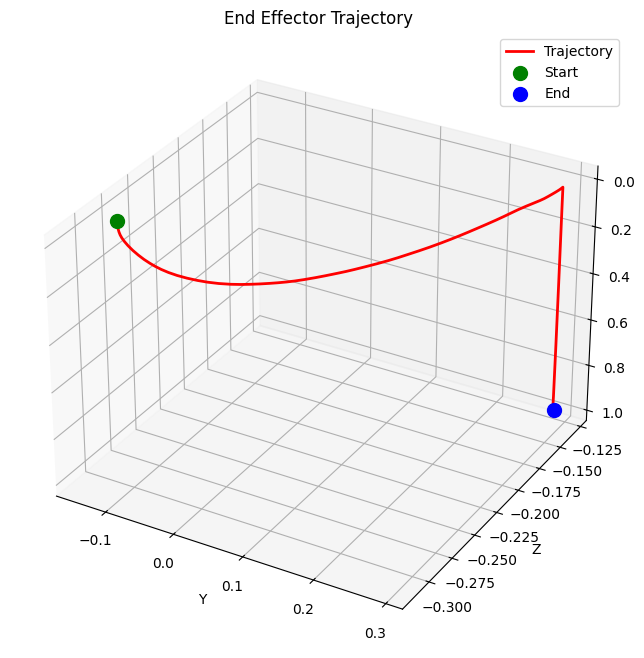

/home/sj/Assistive_Feeding_Gello/csv/90close/output9.csv


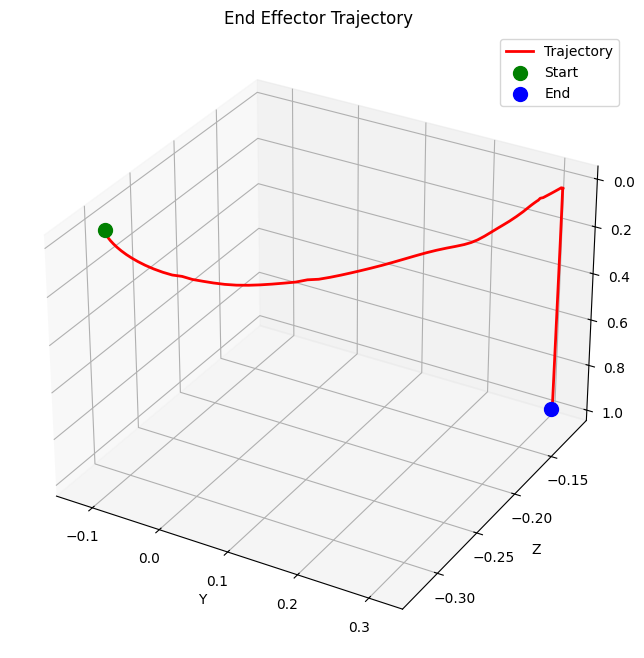

/home/sj/Assistive_Feeding_Gello/csv/90close/output12.csv


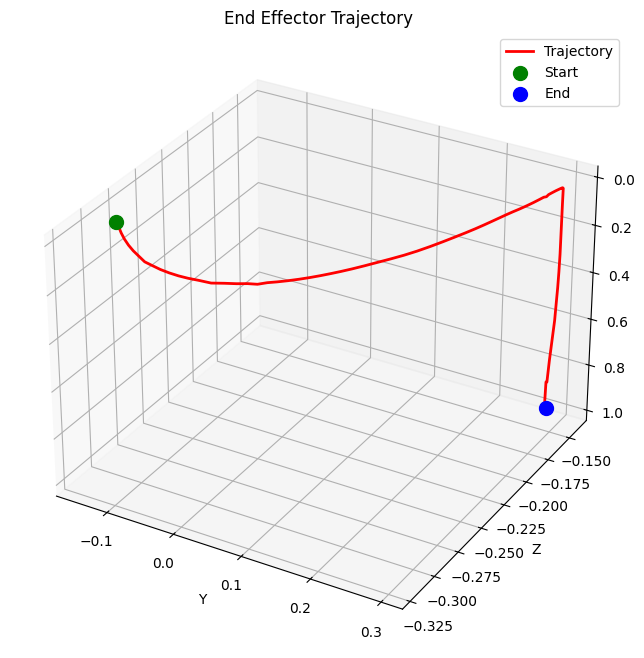

/home/sj/Assistive_Feeding_Gello/csv/90close/output11.csv


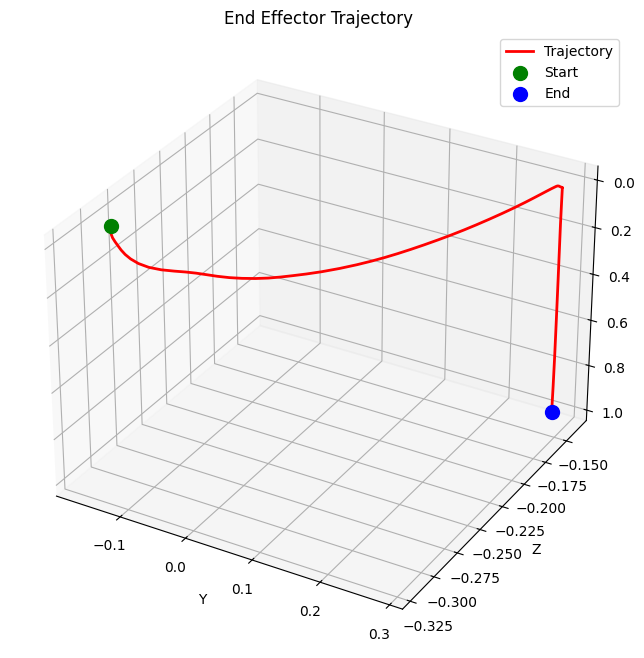

/home/sj/Assistive_Feeding_Gello/csv/90close/output18.csv


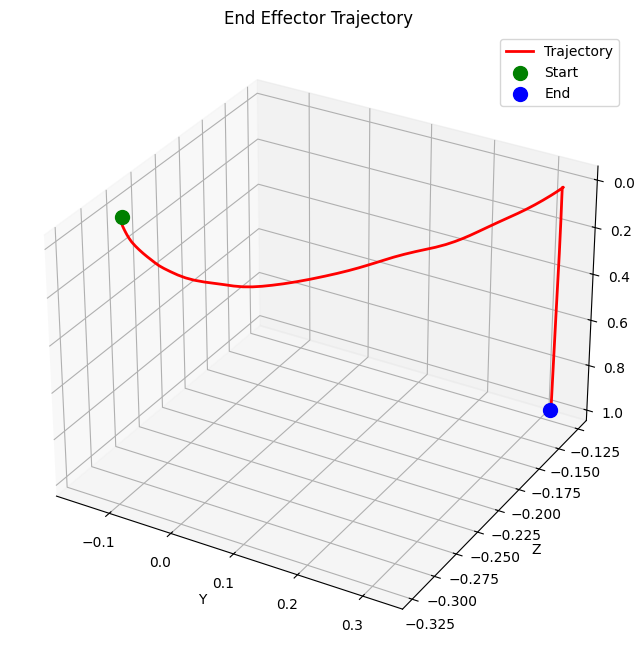

/home/sj/Assistive_Feeding_Gello/csv/90close/output10.csv


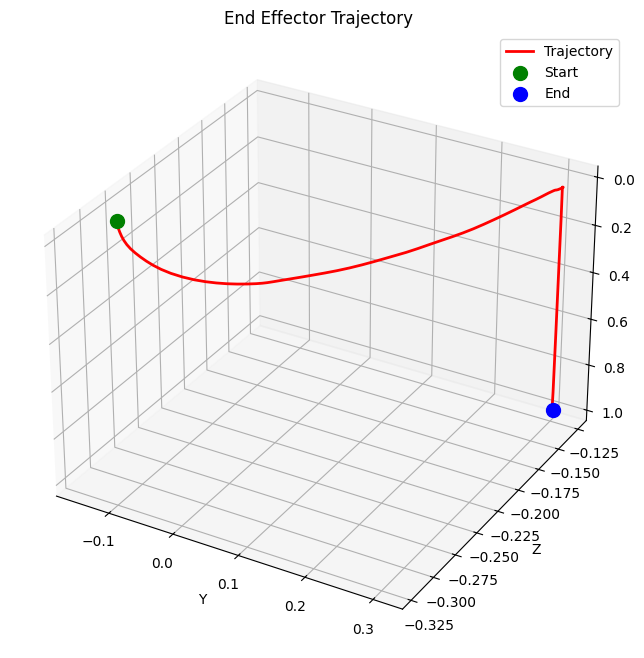

/home/sj/Assistive_Feeding_Gello/csv/90close/output6.csv


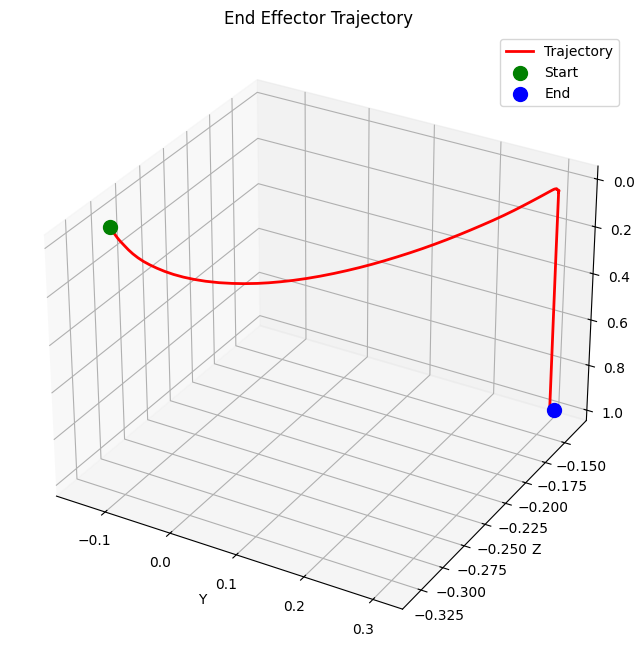

/home/sj/Assistive_Feeding_Gello/csv/90close/output13.csv


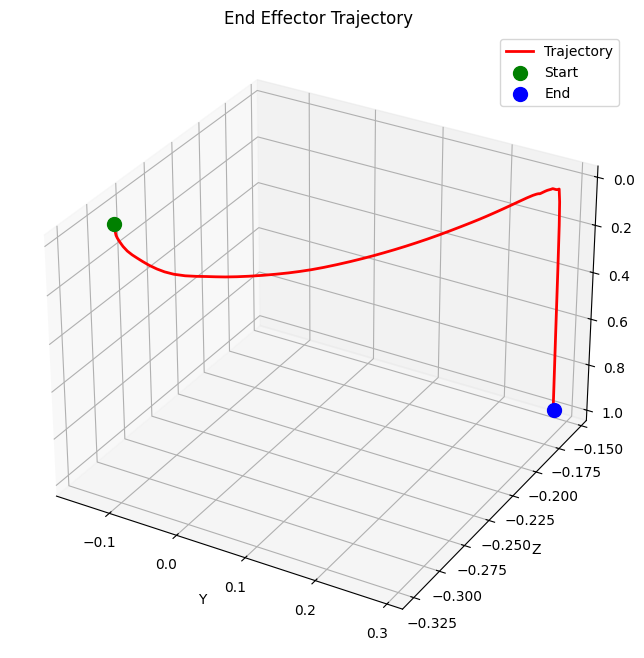

/home/sj/Assistive_Feeding_Gello/csv/90close/output2.csv


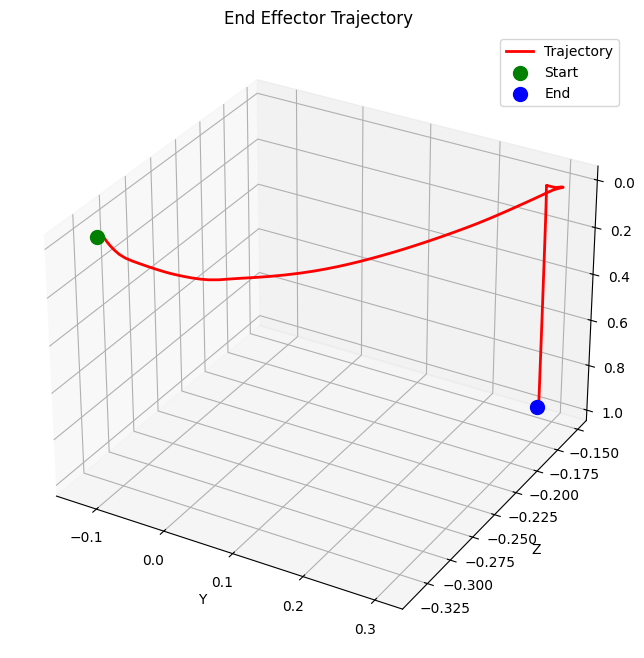

/home/sj/Assistive_Feeding_Gello/csv/90close/output7.csv


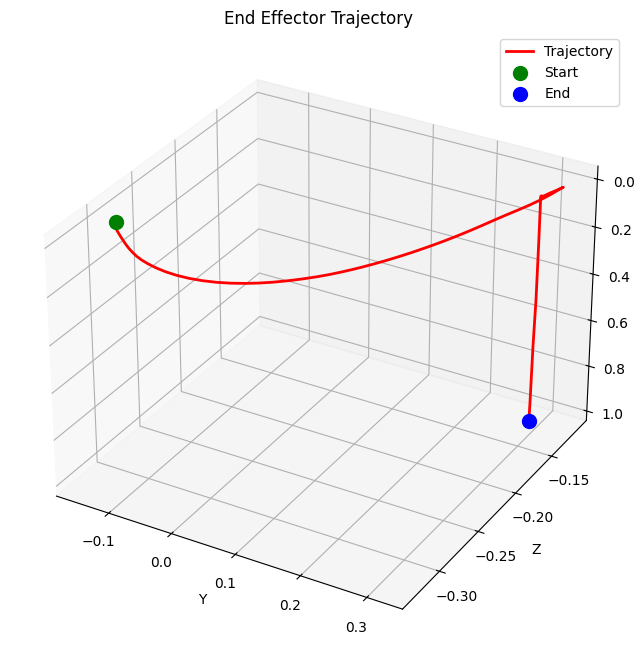

/home/sj/Assistive_Feeding_Gello/csv/90close/output16.csv


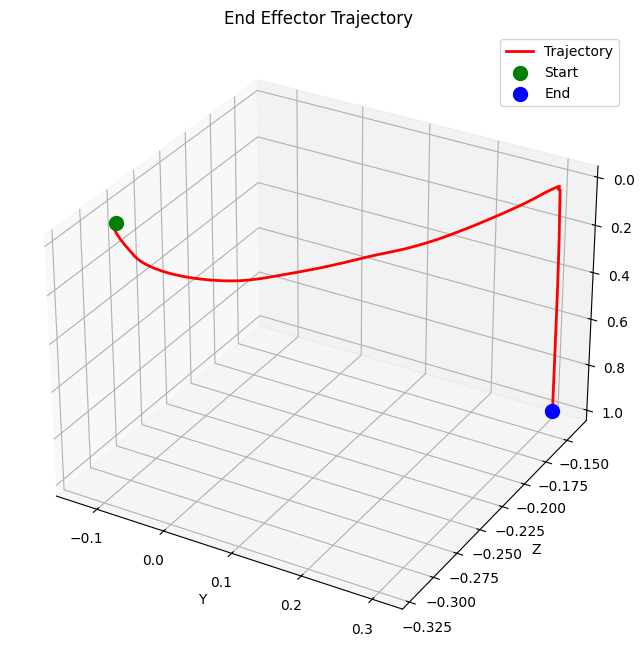

/home/sj/Assistive_Feeding_Gello/csv/90close/output14.csv


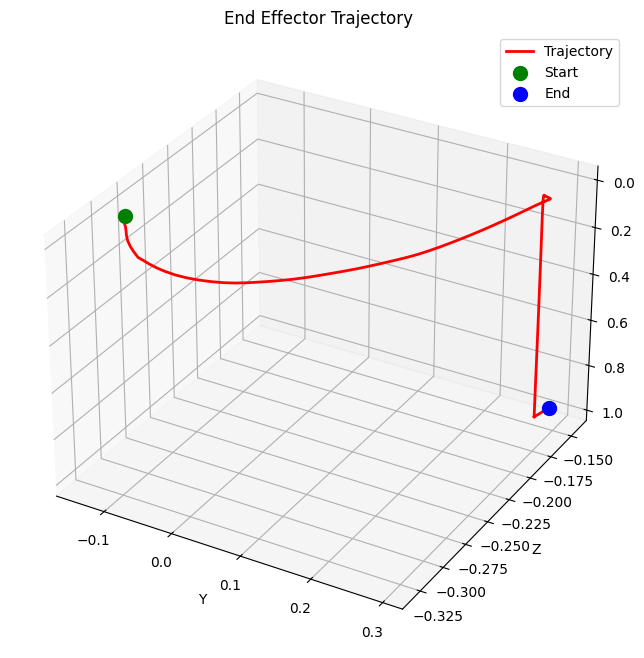

/home/sj/Assistive_Feeding_Gello/csv/90close/output3.csv


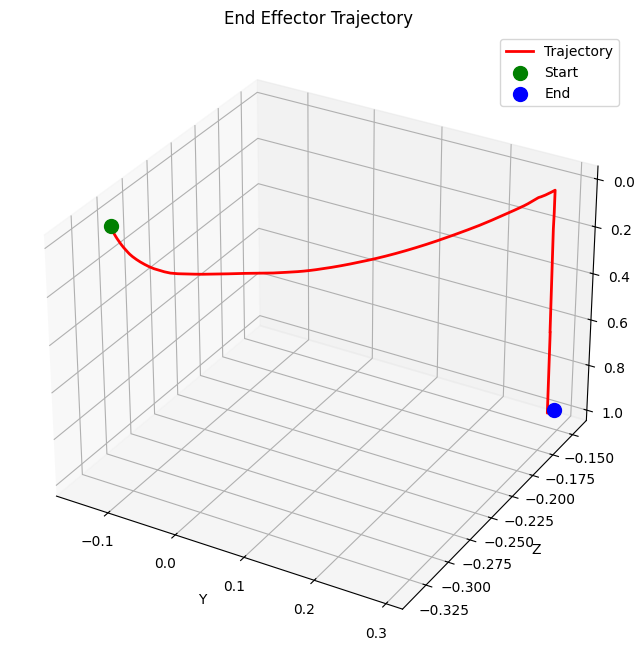

/home/sj/Assistive_Feeding_Gello/csv/90close/output5.csv


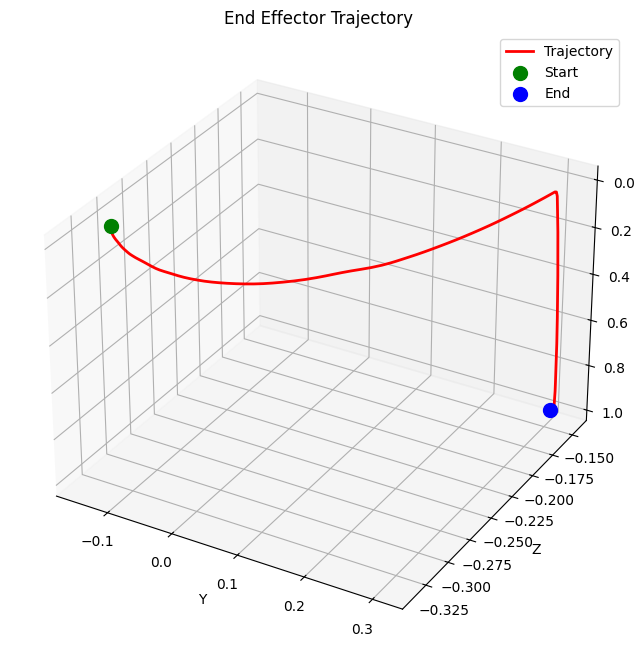

/home/sj/Assistive_Feeding_Gello/csv/90close/output20.csv


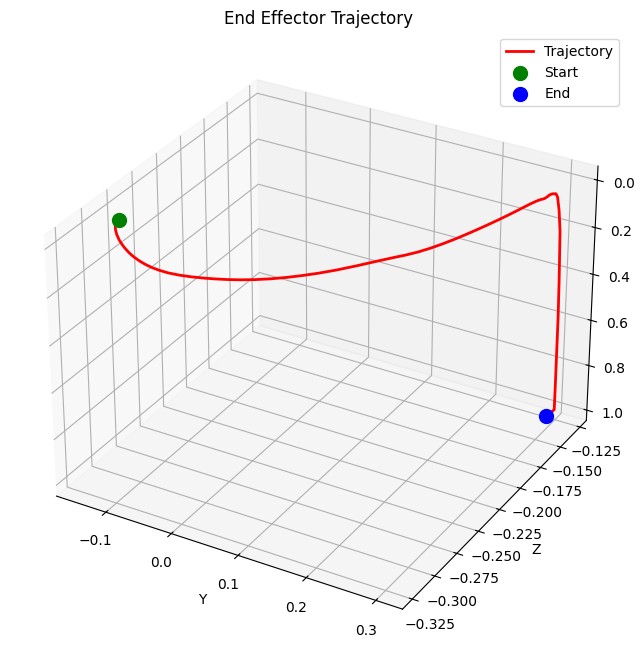

/home/sj/Assistive_Feeding_Gello/csv/90close/output15.csv


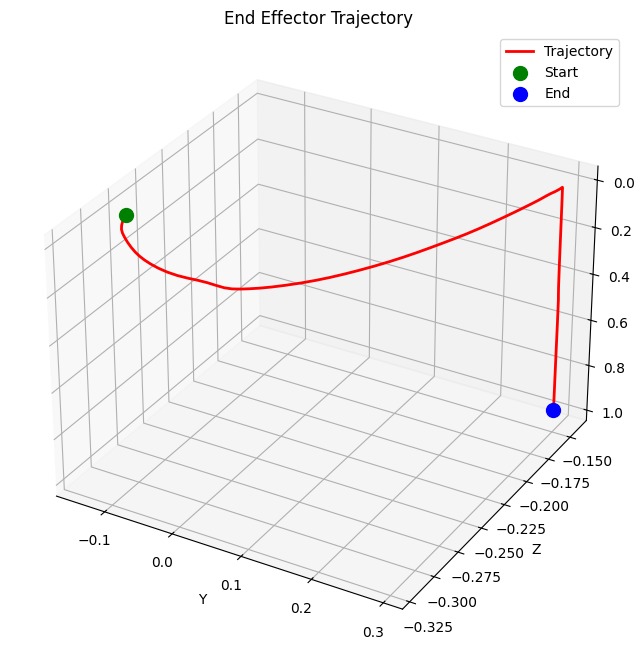

/home/sj/Assistive_Feeding_Gello/csv/90close/output8.csv


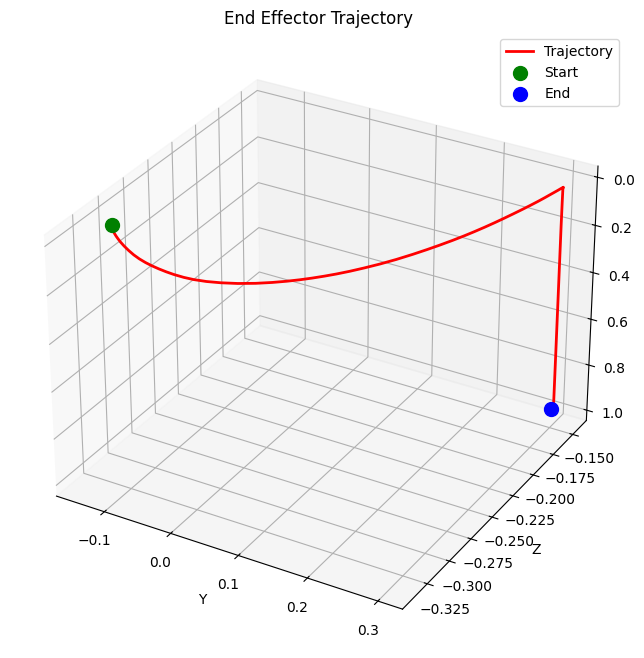

/home/sj/Assistive_Feeding_Gello/csv/90close/output4.csv


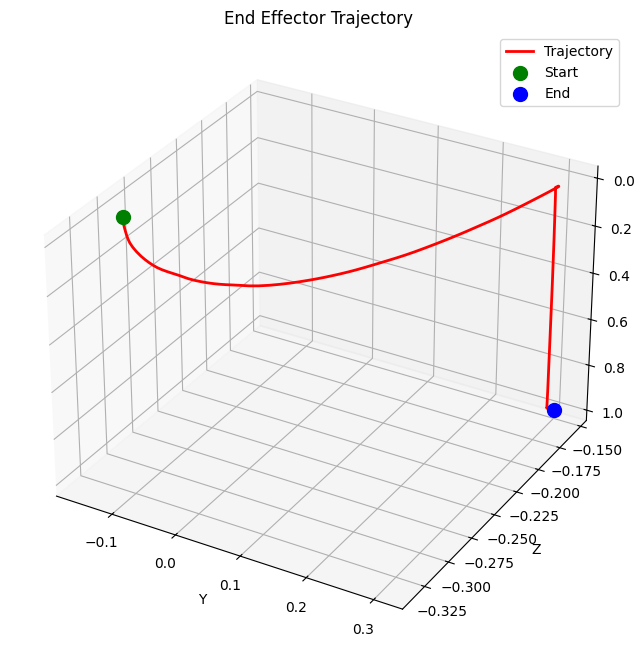

/home/sj/Assistive_Feeding_Gello/csv/90close/output17.csv


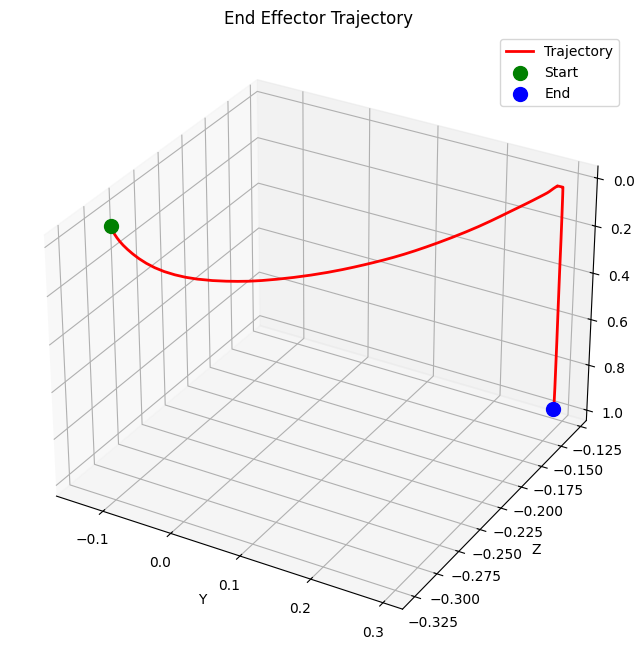

/home/sj/Assistive_Feeding_Gello/csv/90close/output0.csv


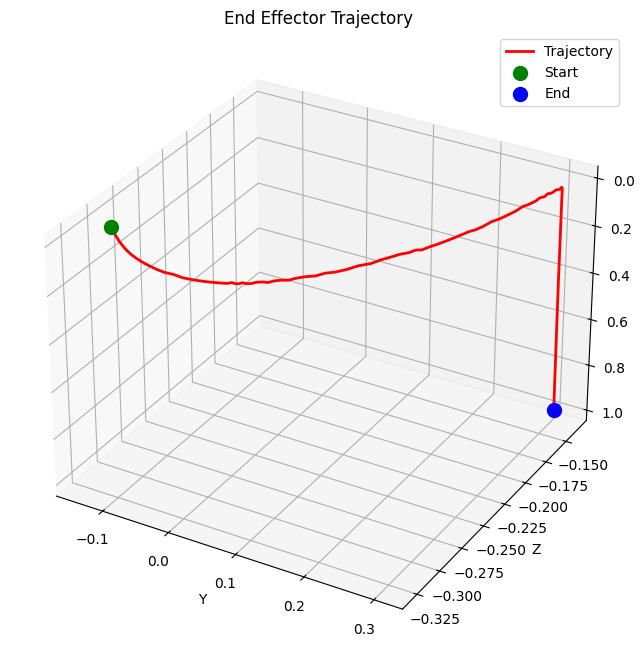

/home/sj/Assistive_Feeding_Gello/csv/90close/output1.csv


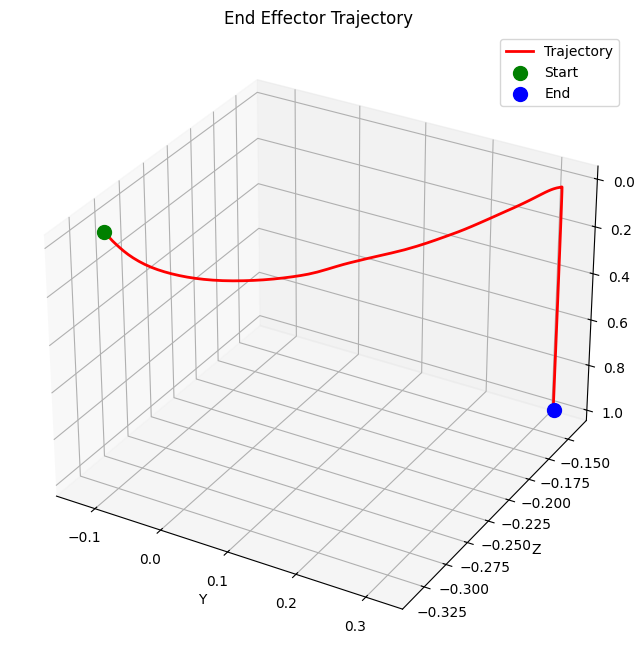

In [25]:
import torch
import matplotlib.pyplot as plt

def visualize_end_effector_trajectory(end_eff_pos):
    # Convert torch tensor to numpy array if necessary
    if isinstance(end_eff_pos, torch.Tensor):
        end_eff_pos = end_eff_pos.cpu().numpy()
    
    # Create a 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the trajectory
    ax.plot(end_eff_pos[:, 1], end_eff_pos[:, 2], end_eff_pos[:, 0], 
            color='red', linewidth=2, label='Trajectory')
    
    # Plot start and end points
    ax.scatter(end_eff_pos[0, 1], end_eff_pos[0, 2], end_eff_pos[0, 0], 
               color='green', s=100, label='Start')
    ax.scatter(end_eff_pos[-1, 1], end_eff_pos[-1, 2], end_eff_pos[-1, 0], 
               color='blue', s=100, label='End')
    
    # Set labels and title
    ax.set_xlabel('Y')
    ax.set_ylabel('Z')
    ax.set_zlabel('X')
    ax.set_title('End Effector Trajectory')
    
    ax.invert_zaxis()

    # Add a legend
    ax.legend()
    
    # Show the plot
    plt.show()

# Assuming you have already loaded your data as described in your code
# and obs["robot0_eef_pos"] contains the end effector positions


import pandas as pd
import numpy as np
import glob
import os

csv_folder = "/home/sj/Assistive_Feeding_Gello/csv/90close"

csv_files = glob.glob(os.path.join(csv_folder, '*.csv'))

low_dim_data = []

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
for csv_file in csv_files:
        joint_data = pd.read_csv(csv_file, usecols=range(0, 6), engine='python').astype(np.float64)
        end_eff_pos_data = pd.read_csv(csv_file, usecols=range(6, 9), engine='python').astype(np.float64)
        end_eff_quat_data = pd.read_csv(csv_file, usecols=range(9, 13), engine='python').astype(np.float64)

        joint_data = np.array(joint_data.values).astype(np.float64)
        end_eff_pos_data = np.array(end_eff_pos_data.values).astype(np.float64)
        end_eff_quat_data = np.array(end_eff_quat_data.values).astype(np.float64)

        # obs = {"robot0_eef_pos": end_eff_pos_data}
        # print(obs["robot0_eef_pos"])

        print(csv_file)
        # Visualize the end effector trajectory
        visualize_end_effector_trajectory(end_eff_pos_data)
